In [1]:
import sys
sys.path.append('../')
sys.path.append("../scripts/")
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.linear_model import LinearRegression
import data_loader_mante as dlm

/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Load Mante dataset

In [2]:
dataset = dlm.ManteDataset(monkey='A', bin_width=5, smoothing_width=50, cavg=True)

Loading data for monkey A
loaded 762 units, binned at 5.0ms


/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  

Averaging over 144 conditions


/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbarbosa/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  

### Some data cleaning, leading to our important variables:
#### X, data tensor with trial-averaged data
#### choice, list of choices the monkey did
#### color, list of color shown to monkey
#### direction, list of direction shown to monkey


In [44]:
# Defining some useful variables
n_conds, n_time, n_units_total = dataset.data_avg.shape

correct_trials = dataset.conditions.correct == 1

# Selecting neurons that have at least one trial for each correct condition
good_neurons = ~np.any(dataset.ntrials[correct_trials] == 0, axis=0)
n_units = good_neurons.sum()
print('Number of neurons exhibiting all conditions: ', n_units)

X_all = dataset.data_avg[:, :, good_neurons]
X = dataset.data_avg[correct_trials][:, :, good_neurons]
print('Cleaned dataset shape: ', X.shape)

choice = dataset.conditions[correct_trials]['choice']
context = dataset.conditions[correct_trials]['context']
direction = dataset.conditions[correct_trials]['stim_dir']
color = dataset.conditions[correct_trials]['stim_col']

Number of neurons exhibiting all conditions:  727
Cleaned dataset shape:  (72, 150, 727)


### Exercise 1: For one random neuron, show the activity of some trials trial through task

In [43]:
direction

72     0
73     0
74     0
75     0
76     0
      ..
139    5
140    5
141    5
142    5
143    5
Name: stim_dir_lvl, Length: 72, dtype: int64

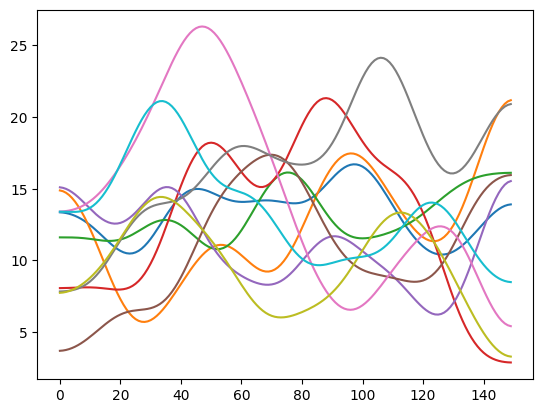

In [29]:
unit = random.randint(0, n_units_total)
rand_trials = random.sample(range(dataset.units[unit].response.shape[0]), 10)


for trial in rand_trials:
    plt.plot(dataset.units[unit].response[trial])



### Exercise 2: plot an histogram to show check the number of trials per neuron

Text(0.5, 0, 'Number of trials')

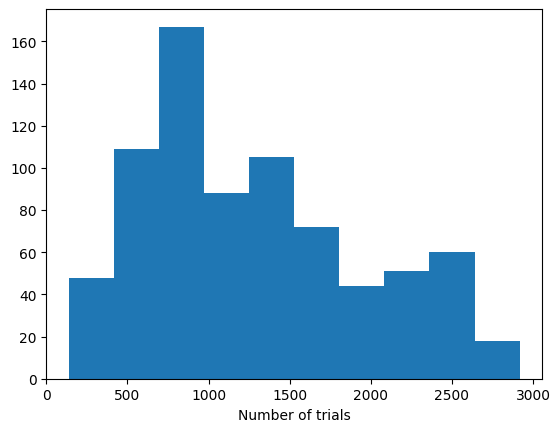

In [32]:
Ntrials = []
for unit in dataset.units:
    Ntrials.append(unit.response.shape[0])
    
plt.hist(Ntrials)
plt.xlabel('Number of trials')

### From now on, we will focus on trial averaged activity, which is stored in X
### Let's start by define a function to look at some condition-averaged neural responses, given the variable (direction, color, response or context)

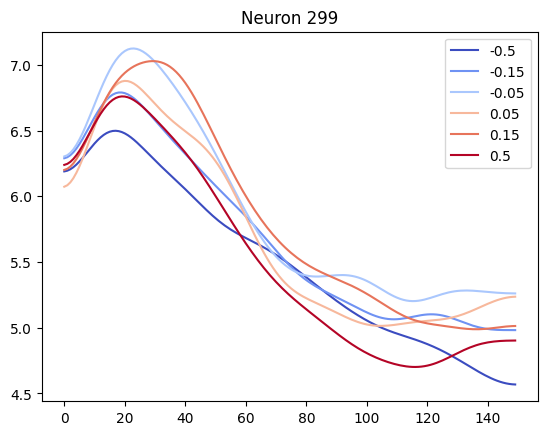

In [56]:
unit = random.randint(0, n_units)

def plot_traj(var):
   k = 0
   for i in np.unique(var):
      plt.plot(X[var == i, :, unit].mean(axis=0), c=cm.coolwarm(k / 6),label=np.round(i,2))
      if k == 2: k=k+2 
      else: k = k + 1
   plt.title(f'Neuron {unit}')

   plt.legend()

plot_traj(color)


### Exercise 3: build a function to plot a tuning curve for one neuron averaging the activity during the stimulus

([<matplotlib.axis.XTick at 0x7fb3bf1aef10>,
 [Text(-1, 0, 'color'), Text(1, 0, 'motion')])

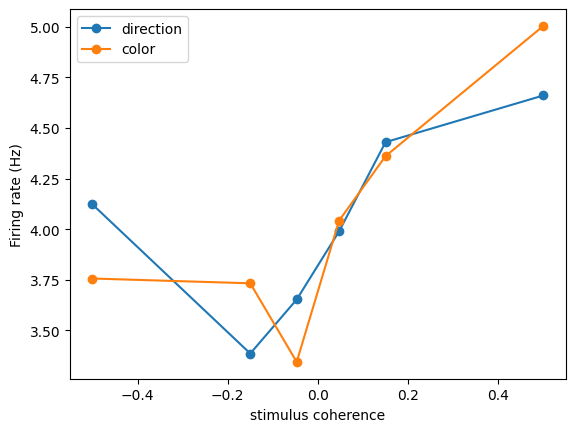

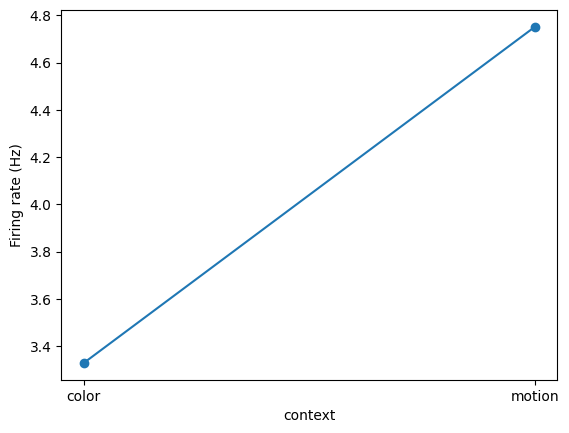

In [63]:
def plot_tc(var,unit,label=""):
   tc = []
   xx = []
   for i in np.unique(var):
      c=X[var == i, :, unit].mean(axis=0).mean(0)
      tc.append(c)
      xx.append(i)
   plt.plot(xx,tc,"-o",label=label)


unit = random.randint(0, n_units)

plot_tc(direction,unit,"direction")
plot_tc(color,unit,"color")
plt.legend()
plt.ylabel('Firing rate (Hz)')
plt.xlabel('stimulus coherence')

plt.figure()
plot_tc(choice,unit,"context")
plt.ylabel('Firing rate (Hz)')
plt.xlabel('context')
plt.xticks([-1,1],['color','motion'])



### Exercise 4: plot a big plot with 100 neurons tuning curves. 
What seems to change and being common across neurons?

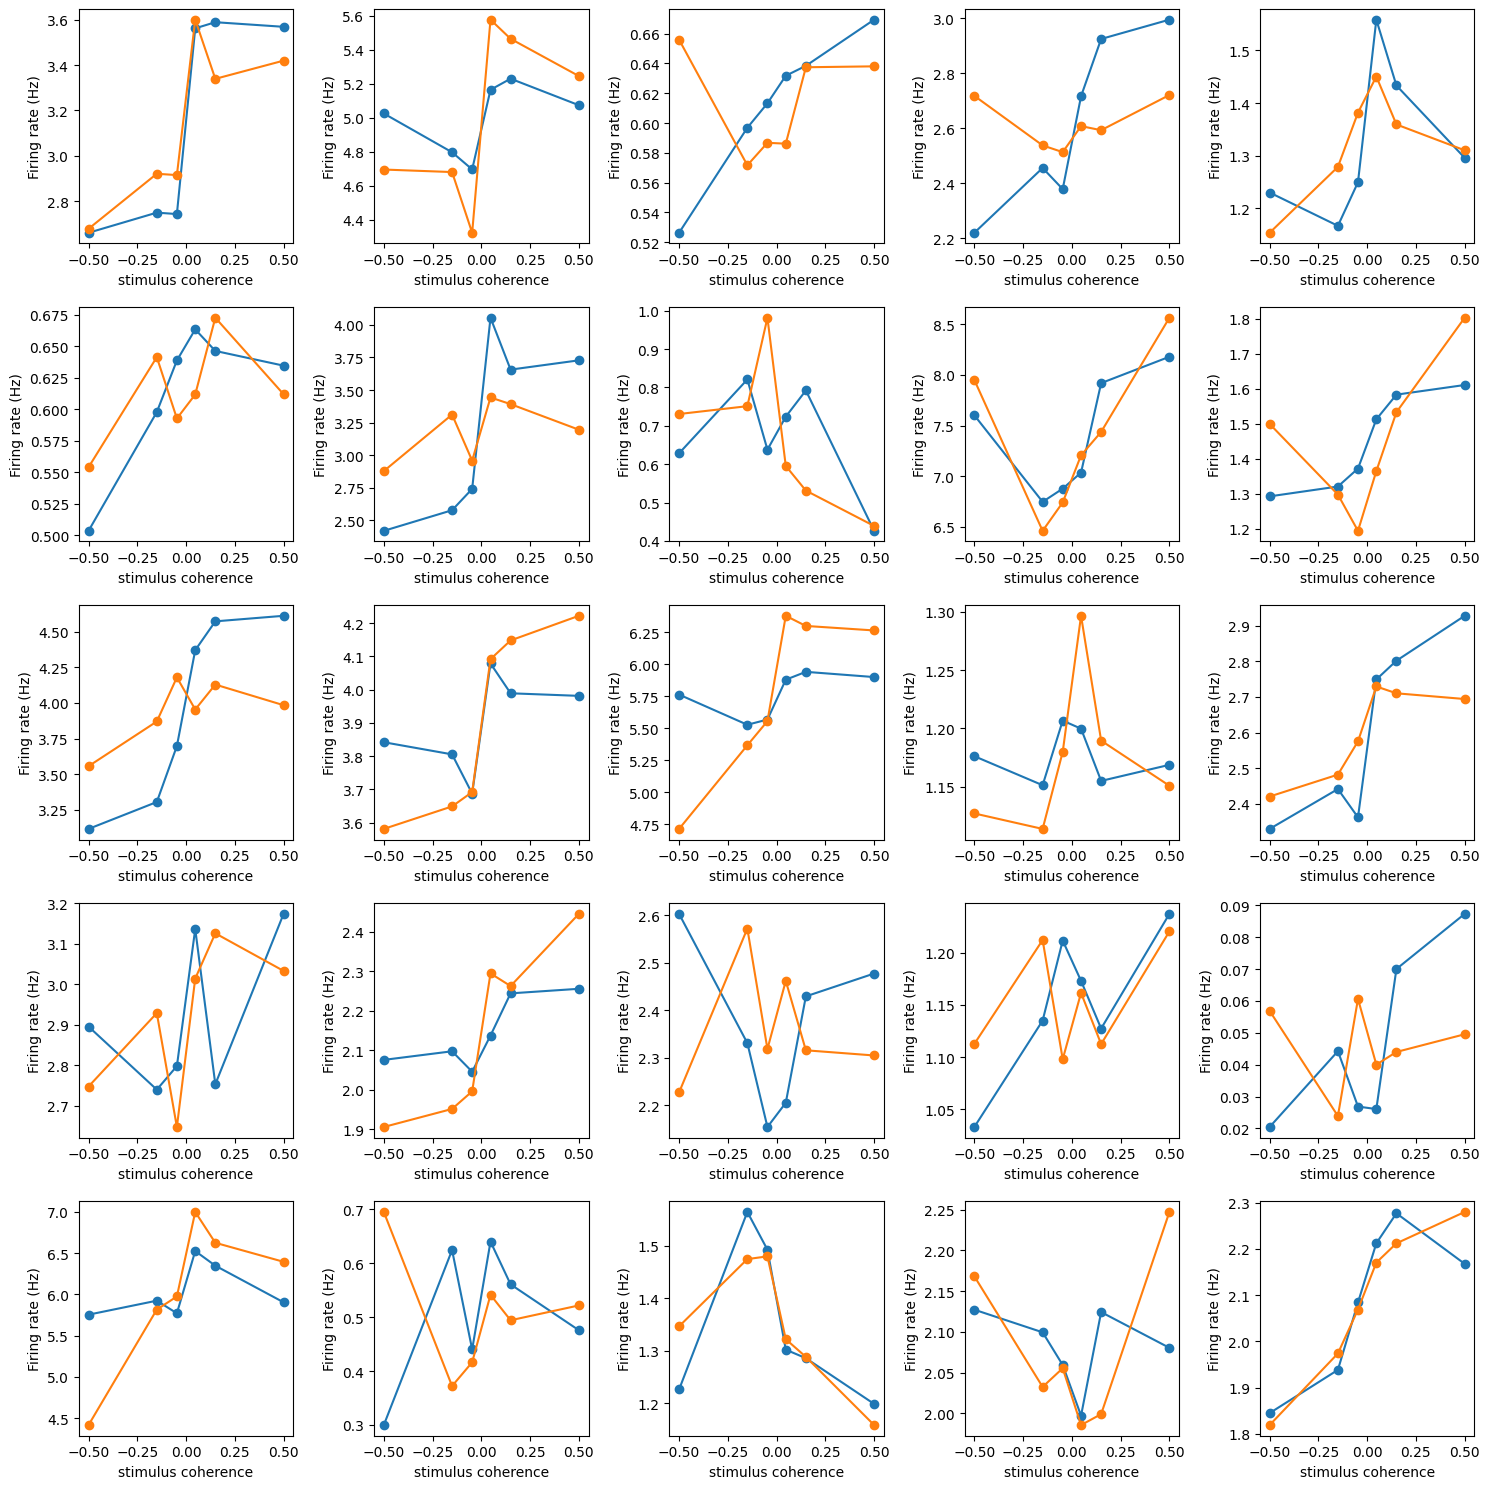

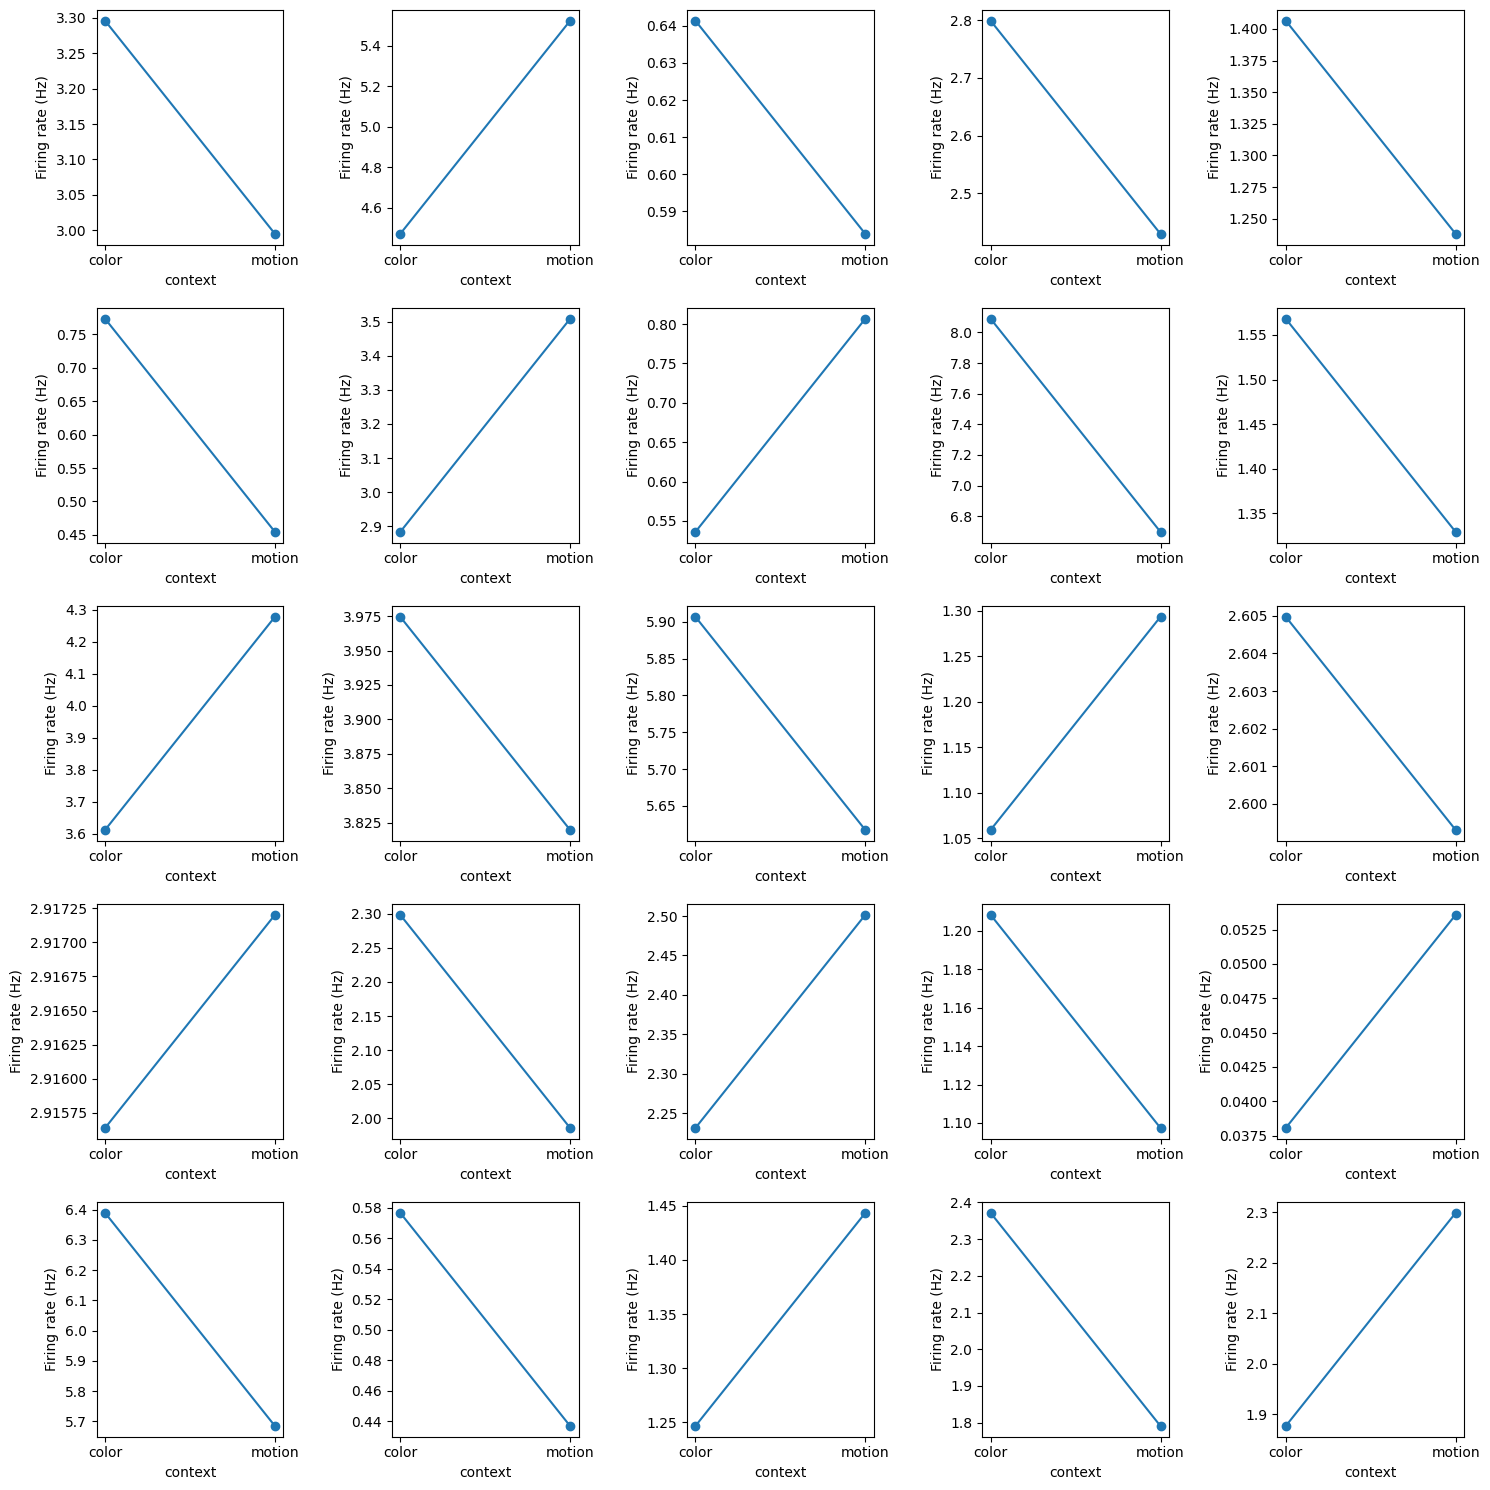

In [72]:

rand_units = random.sample(range(1, n_units), 25)

plt.figure(figsize=(15, 15))
i = 1
for unit in rand_units:
    plt.subplot(5, 5, i)
    for var in [direction, color]:
        plot_tc(var,unit)
        plt.tight_layout()
        plt.ylabel('Firing rate (Hz)')
        plt.xlabel('stimulus coherence')

    i=i+1


plt.figure(figsize=(15, 15))
i = 1
for unit in rand_units:
    plt.subplot(5, 5, i)
    
    plot_tc(context,unit)
    plt.ylabel('Firing rate (Hz)')
    plt.xlabel('context')
    plt.xticks([-1,1],['color','motion'])
    plt.tight_layout()

    i=i+1


### Exercise 5: it seems that activity during one context is often higher than the other one. How can we know if that is true and not a statistical coincidence?

In [9]:
import scipy.stats as sts
sts.ttest_1samp((X[context ==1]-X[context ==-1]).mean(0).mean(0),0)


Ttest_1sampResult(statistic=-7.0656706419362365, pvalue=3.7539404318941965e-12)

### Advanced exercise: 
1. use PCA to reduce de dimensionality of all these neurons to only 2. Then average all condition Do you see any patern?
tip: chose a time point to perform PCA, for example 140
tip: try plotting trajectories of the same choice with the same color

2. Repeat the process trying different time points. what do you see?


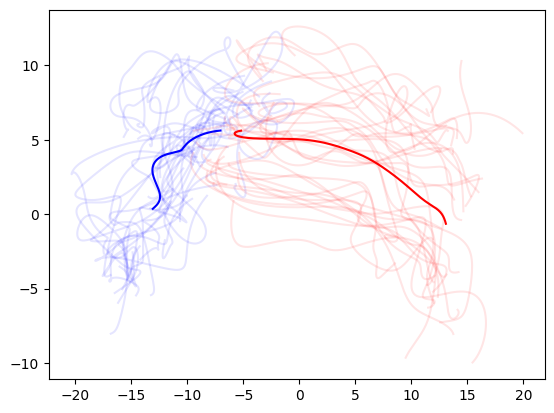

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_time = pca.fit(X[:,140]) 

X_pca = np.array([X_pca_time.transform(X[:,t]) for t in range(X.shape[1])])
#plt.plot(X_pca[:,:, 0], X_pca[:,:, 1])

for i in np.unique(choice):
    plt.plot(X_pca[:,choice == i, 0], X_pca[:,choice == i, 1],color=cm.bwr((i+1)/2), alpha=0.1)
    plt.plot(X_pca[:,choice == i, 0].mean(1), X_pca[:,choice == i, 1].mean(1),color=cm.bwr((i+1)/2))

plt.show()

# Very advanced: code for TDR

In [11]:
to_decode_vars = ['stim_dir', 'stim_col','choice']

all_betas = []

for ctx_idx in [context!=0, context==-1,context==1]:

    conditions_regressors = dataset.conditions[correct_trials][to_decode_vars].to_numpy()
    conditions_regressors = conditions_regressors[ctx_idx]

    X_mean = np.mean(X[ctx_idx], axis=(0, 1))
    X_flat = X[ctx_idx] - X_mean
    X_percond = X_flat.reshape((conditions_regressors.shape[0], -1))
    print(conditions_regressors.shape)
    print(X_percond.shape)
    # Linear regression
    linmodel = LinearRegression(fit_intercept=True)
    linmodel = linmodel.fit(conditions_regressors, X_percond)

    betas = linmodel.coef_.T.reshape((len(to_decode_vars), n_time, -1))
    intercepts = linmodel.intercept_.T.reshape((n_time, -1))
    betas = np.concatenate([betas, intercepts[np.newaxis, :, :]], axis=0)
    print(betas.shape)

    all_betas.append(betas)

(72, 3)
(72, 109050)
(4, 150, 727)
(36, 3)
(36, 109050)
(4, 150, 727)
(36, 3)
(36, 109050)
(4, 150, 727)


Text(0.5, 0, 'time (dt=5ms)')

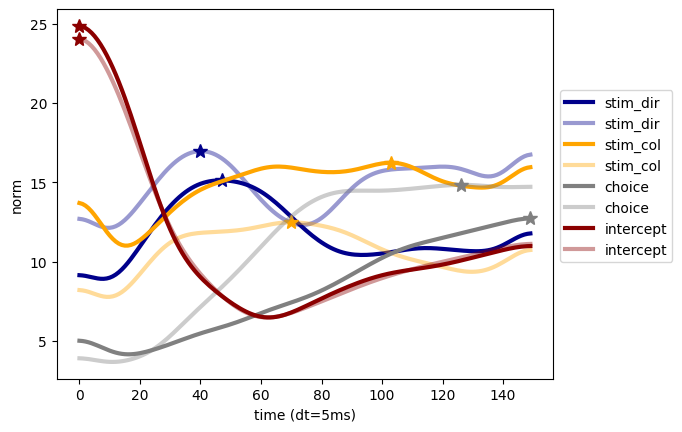

In [12]:
# print norm of the vectors and identify t_max
colors = ['darkblue','orange','gray','darkred']
lines = ['-','-','--']
alphas = [1,0.4,0.4]

tmaxes = []
labels = to_decode_vars.copy()
labels.append('intercept')
for i in range(len(labels)):
    for b,betas in enumerate(all_betas[1:]):
        norms = np.linalg.norm(betas[i], axis=1)
        plt.plot(norms, label=labels[i], c=colors[i],lw=3,ls=lines[b],alpha=alphas[b])
        tmaxes.append(np.argmax(norms))
        plt.plot([tmaxes[-1]], [norms[tmaxes[-1]]], marker='*', c=colors[i], markersize=10)
plt.legend(bbox_to_anchor=(1, .8))
plt.ylabel('norm')
plt.xlabel('time (dt=5ms)')

In [13]:
# # Choose timepoints for the axes, orthogonalize

beta_choice = betas[0, tmaxes[0]]
beta_motion = betas[1, tmaxes[1]]
beta_color = betas[2, tmaxes[2]]
beta_context = betas[3, tmaxes[3]]
Bmat = np.vstack([beta_choice, beta_motion, beta_color, beta_context]).T
print(Bmat.shape)
BmatQ, _ = np.linalg.qr(Bmat)
beta_choice = BmatQ[:, 0]
beta_motion = BmatQ[:, 1]
beta_color = BmatQ[:, 2]
beta_context = BmatQ[:, 3]

(727, 4)


## And the famous TDR visualizations

Note: it's better when the entire intercept is removed

In [14]:
# TODO formalize in a file
def conditions_averaged_plot(data, conditions, ax1, ax2, colors):
    for cond, col in zip(conditions, colors):
        tensor_tmp = data[cond].mean(axis=0)  # Averaging across all conditions that match the constraints
        plt.plot(tensor_tmp @ ax1, tensor_tmp @ ax2, c=col)
        plt.plot(tensor_tmp[0] @ ax1, tensor_tmp[0] @ ax2, marker='o', c=col)

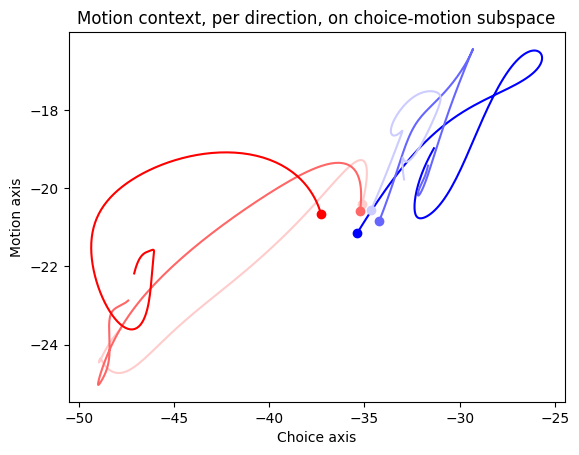

In [15]:
plt.title('Motion context, per direction, on choice-motion subspace')
plt.xlabel('Choice axis')
plt.ylabel('Motion axis')

conditions_plot = [((direction == i) & (context == 1)) for i in range(0, 6)]
colors_plot = [cm.bwr(i/5) for i in range(0, 6)]

conditions_averaged_plot(X, conditions_plot, beta_choice, beta_motion, colors_plot)